# Tree tomography - December 17, 2023

This covers the first day's data taken from a cedar log (aka "The Log o' Science").

In [1]:
from datetime import datetime, timedelta
import json
import pytz

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import scipy
# pd.set_option('max_columns', 50)

mpl.style.use('ggplot')

%matplotlib inline

# Today's data

- no holes: the log in its original condition.
- one hole: the log with one 1" (2.54 cm) hole drilled out in the middle.
- three holes: the log with that 1" hole extended on either side; total length ~ 2.75", total depth ~ 3.5"
- three holes, second time: after moving the protective board for sensor 1 so now poking up above log level -- hopefuly to get more consistent hit from hammer
- Files edited to remove outliers (values in 10s or 100s of thousands of microseconds)

TODO: Add pictures


In [2]:
df = pd.DataFrame()
# Note: there are more values for the three_holes file.  We'll read this in first 
# so we don't have everything clamped to the shorter length of the no_holes file,
# but then we'll swap things around.
df["three_holes"] = pd.read_csv("third_run_1_to_2.csv", header=None)
df["one_hole"] = pd.read_csv("second_run_1_to_2.csv", header=None)
df["no_holes"] = pd.read_csv("first_run_1_to_2.csv", header=None)

cols = list(df.columns)
cols.reverse()
df = df[cols]
df["three_holes_second_time"] = pd.read_csv("2023-12-17_15:40:39.csv", header=None)

df

,no_holes,one_hole,three_holes,three_holes_second_time
0,421.18,701.76,697.00,751.28
1,698.22,714.18,464.00,723.32
2,694.68,695.54,1609.88,737.48
3,725.82,728.60,482.98,732.56
4,1356.54,709.28,706.30,711.70
5,690.90,690.30,485.18,611.94
6,685.12,704.42,1689.60,754.40
7,684.58,699.66,920.80,1652.38
8,689.44,699.90,1596.14,612.98
9,1350.10,692.18,698.22,764.86


In [3]:
def get_mean_and_std_in_cluster(df: pd.DataFrame, col: str, min: float, max: float) -> (float, float):
    """Get the mean of a column in df where its 
    values are between min and max.

    Helpful for getting the mean of a cluster, 
    rather than the mean of the whole column.

    Args:
      df: dataframe
      col: name of column in dataframe
      min: min range
      max: max range

    Returns:
      tuple(float, float): mean and stddev of values in that range
    """
    idx = df[col].between(min, max, inclusive="both")
    # print(idx)
    return (
        df[col][idx].mean(),
        df[col][idx].std(),
    )
    
print(get_mean_and_std_in_cluster(df, "no_holes", 600, 800))
print(get_mean_and_std_in_cluster(df, "one_hole", 600, 800))
print(get_mean_and_std_in_cluster(df, "three_holes", 600, 800))
print(get_mean_and_std_in_cluster(df, "three_holes_second_time", 600, 800))

(692.018125, 8.330817036761761)
(700.6917073170731, 10.658549597022812)
(694.1962962962963, 23.984223043195602)
(725.517894736842, 42.5776659736778)


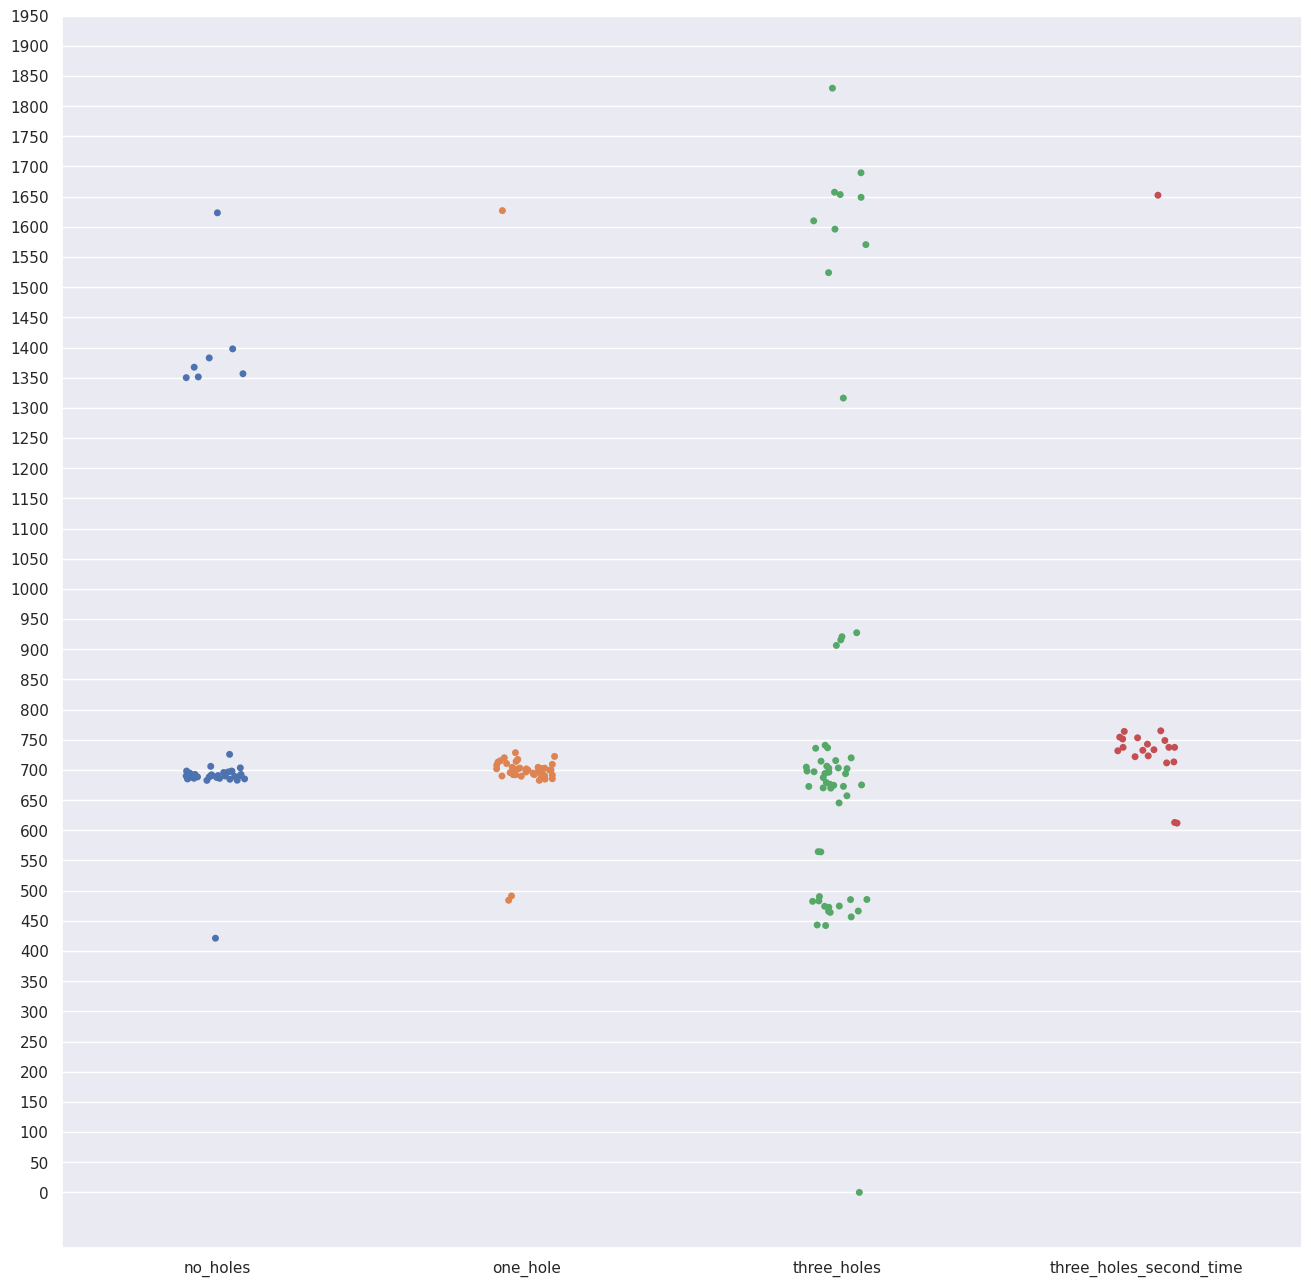

In [4]:
[x for x in range(0, 2000, 50)]
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4

line_plot = sns.stripplot(data=df) # .set(title="Sensor 1 -> 2 in Log o' Science", ylabel="microseconds")
plt.yticks([y for y in range(0, 2000, 50)])
fig = line_plot.get_figure()
fig.savefig('my_lineplot.png')

In [5]:
df.std()

no_holes                   283.187950
one_hole                   148.434534
three_holes                405.175041
three_holes_second_time    211.355417
dtype: float64

# First impressions
* The spread in the three hole data is quite obvious.
* It's interesting to see the data between 400 & 500 microseconds:
  * one value for no holes, one hole
  * a dozen or more for three holes
* Same is true for 1500-1800 microseconds, though that ignores the 1350-1400 microsecond cluster in no hole data.
* Need more data!
  * There was a certain amount of moving/changing things.
  * The hammer was resting on the board; it should be stood up beside it.
  * Wonder if the single value clusters in no holes/one holes would have been multiple values if I'd got, say, 100 hits each.
* I *really* wonder what's going on with the clustering.